In [1]:
# Approach to generate the linear trajectory to every trajectory recived from fiji to then compre
# them by some metrics:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
# Creating the sample data frame randomly generated
df_random = pd.DataFrame(columns=['Track_name','start_x', 'start_y', 'end_x', 'end_y', 'Move_frames'])

In [3]:
# Generating 10 random positions for start and end points:
track_names = [f'track_{i}' for i in range(1,21)]
df_random['Track_name'] = track_names
df_random['Move_frames'] = random.sample(range(5,100), 20)

col_list = ['start_x', 'start_y', 'end_x', 'end_y']
for col in col_list:
    df_random[col] = random.sample(range(0,40), 20)
    
df_random

,Track_name,start_x,start_y,end_x,end_y,Move_frames
0,track_1,29,12,24,25,43
1,track_2,36,35,33,24,8
2,track_3,25,24,22,18,19
3,track_4,14,8,37,39,63
4,track_5,30,26,38,8,53
5,track_6,17,16,18,29,65
6,track_7,9,9,16,23,69
7,track_8,10,22,3,12,74
8,track_9,27,36,31,20,59
9,track_10,0,14,5,11,10


In [4]:
# function to generating random intigers for the pos_x and y in every move frame

def generate_random_integers(n):
    return np.random.randint(1, 50, size = (n, 2))

# creating a new data frame with equal number of rows based on the 'number' column
df_move_frames = pd.DataFrame(np.repeat(df_random.values, df_random['Move_frames'], axis = 0),
                              columns=df_random.columns)

track_names = ['track_1', 'track_2', 'track_3', 'track_4', 'track_5', 'track_6', 'track_7', 'track_8',
               'track_9', 'track_10', 'track_11', 'track_12', 'track_13', 'track_14', 'track_15', 'track_16',
               'track_17', 'track_18', 'track_19', 'track_20',]

# Initiating the rows with the nan pos_x and pos_y columns:
df_move_frames['pos_x'] = pd.Series([float('nan')] *len(df_move_frames))
df_move_frames['pos_y'] = pd.Series([float('nan')] *len(df_move_frames))

for name in track_names:
    counter = 0
    for index, row in df_move_frames[df_move_frames['Track_name'] == name].iterrows():
        if row[0] == str(name):
            if counter == 0:
                df_move_frames.loc[index, 'pos_x'] = row['start_x']
                df_move_frames.loc[index, 'pos_y']= row['start_y']
            elif counter == (row['Move_frames'] - 1):
                df_move_frames.loc[index, 'pos_x'] = row['end_x']
                df_move_frames.loc[index, 'pos_y'] = row['end_y']
            else:
                df_move_frames.loc[index, 'pos_x'] = random.randint(1, 100)
                df_move_frames.loc[index, 'pos_y']= random.randint(1, 100)
            counter += 1

df_move_frames.to_csv('df_example_generated.csv')


In [5]:
df_move_frames

,Track_name,start_x,start_y,end_x,end_y,Move_frames,pos_x,pos_y
0,track_1,29,12,24,25,43,29.0,12.0
1,track_1,29,12,24,25,43,45.0,97.0
2,track_1,29,12,24,25,43,77.0,42.0
3,track_1,29,12,24,25,43,64.0,62.0
4,track_1,29,12,24,25,43,53.0,75.0
...,...,...,...,...,...,...,...,...
1143,track_20,33,19,10,9,87,56.0,41.0
1144,track_20,33,19,10,9,87,50.0,31.0
1145,track_20,33,19,10,9,87,30.0,48.0
1146,track_20,33,19,10,9,87,47.0,41.0


In [6]:
# Generating straight line points throught the Bresenham's algorithm

def get_intermidiate_points(A, B, steps):
    x1, y1 = A
    x2, y2 = B
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    # Saving points in line as the list of tuples:
    points = [(x1, y1)]
    
    # Itearting to the end point:
    for i in range(steps-1):
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
        points.append((x1, y1))
        
    return points

In [7]:
# Also lets add straight amtmematical approach to getting sample from line:
# where we give th coordinates, and number of samples we get so if the movement was
# 40 frames we get 40 samples becasue we know the start and end points we need 38 more beetwen knowns
# points
def get_points_on_line(x_A, y_A, x_B, y_B, n_samples):
    # Calcualting distance between those points:
    distance = math.sqrt((x_B - x_A)**2 + (y_B - y_A)**2)
    
    # Returning the starting points if the program end up getting the same set of points as
    # start and end positions:
    if distance == 0:
        return [(x_A, y_A)]
    
    #step = (x_B - x_A) / (n_samples-1)
    
    # Calcualting the slope of the line and the b y-intercept
    m = (y_B - y_A) / (x_B - x_A)
    b = y_A - m * x_A
    
    # Create the list of x values with n_samples elements:
    x_values = [x_A + (x_B - x_A) * i/(n_samples - 1) for i in range(n_samples)]
    
    # Calculating coresponding y values for each x value:
    points = [(x, m*x + b) for x in x_values]
    
    # Checking if the last point is already in the list (due to rounding errors)
    if points[-1] != (x_B, y_B):
        points.append((x_B, y_B))
    
    # Setting the points list:
    #points = []
    
    #x = x_A
    
    #while x < x_B - step/2:
    #    y = m * x + b
    #    points.append((x, y))
    #    x += step
        
    return points

In [8]:
# Added third version of generating the points in line but covering also the vertical lines which
# can be generated randomly:

def generating_points_in_line_mark_2(x_A, y_A, x_B, y_B, n_samples):
    if x_A == x_B: # vertical line
        y_values = [y_A + i*(y_B-y_A)/(n_samples-1) for i in range(n_samples)]
        x_values = [x_A] * n_samples
    else: # non-vertical line
        x_values = [x_A + i*(x_B-x_A)/(n_samples-1) for i in range(n_samples)]
        y_values = [y_A + i*(y_B-y_A)/(n_samples-1) for i in range(n_samples)]

    # make sure first and last points are (x_A, y_A) and (x_B, y_B) respectively
    x_values[0] = x_A
    y_values[0] = y_A
    x_values[-1] = x_B
    y_values[-1] = y_B

    # create a list of tuples representing the generated points
    points = [(x_values[i], y_values[i]) for i in range(n_samples)]

    return points

In [9]:
# From the Bersenham's algorithm:
random_points = get_intermidiate_points((0,0), (0,150), 170)
#random_points

# From the straight amthematical approach:
random_points_math = generating_points_in_line_mark_2(0,0, 0,150, 170)
#random_points_math

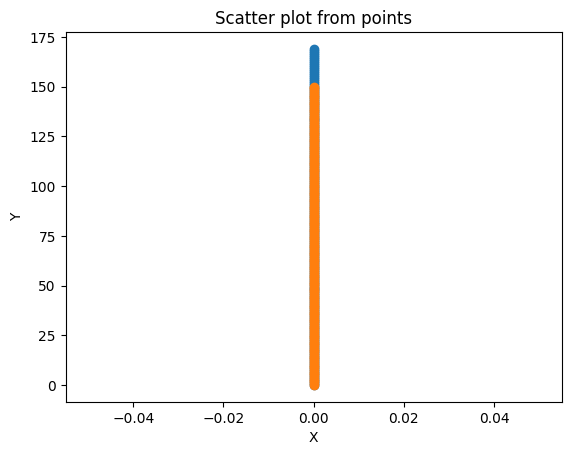

In [10]:
# Chcecking the performance of the algorithm:

# Unpacking the tuples into the separete x and y:
# first list:
x_values, y_values = zip(*random_points)
# second list:
x_2, y_2 = zip(*random_points_math)

# Creating scatterplot:
plt.scatter(x_values, y_values, label = 'Algoritm')
plt.scatter(x_2, y_2, label = 'Math_approach')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()

In [11]:
# Getting the number of tracks and position of start and end:

def get_unique_starting_pos(df):
    
    grouped = df.groupby('Track_name')
    
    # For storing name and the unique starting postions
    track_dict = {}
    # Iterate throught each group:
    for name, group in grouped:
        move_frames = int(group[['Move_frames']].drop_duplicates().values[0])
        start_cords = tuple(group[['start_x','start_y']].drop_duplicates().values[0])
        end_cords = tuple(group[['end_x','end_y']].drop_duplicates().values[0])
        
        track_dict[name] = (start_cords, end_cords, move_frames)

    return track_dict

In [12]:
track_dict = get_unique_starting_pos(df_move_frames)
track_dict

{'track_1': ((29, 12), (24, 25), 43),
 'track_10': ((0, 14), (5, 11), 10),
 'track_11': ((8, 21), (27, 7), 17),
 'track_12': ((13, 30), (9, 27), 95),
 'track_13': ((1, 5), (23, 26), 84),
 'track_14': ((12, 2), (6, 17), 82),
 'track_15': ((15, 0), (19, 38), 91),
 'track_16': ((38, 29), (14, 22), 94),
 'track_17': ((26, 17), (25, 6), 32),
 'track_18': ((32, 39), (7, 2), 96),
 'track_19': ((3, 33), (11, 28), 7),
 'track_2': ((36, 35), (33, 24), 8),
 'track_20': ((33, 19), (10, 9), 87),
 'track_3': ((25, 24), (22, 18), 19),
 'track_4': ((14, 8), (37, 39), 63),
 'track_5': ((30, 26), (38, 8), 53),
 'track_6': ((17, 16), (18, 29), 65),
 'track_7': ((9, 9), (16, 23), 69),
 'track_8': ((10, 22), (3, 12), 74),
 'track_9': ((27, 36), (31, 20), 59)}

In [13]:
def generate_straight_line_positions(track_dict):
    
    # Setting the dictionary to store output values of position and the name of a track:
    track_in_line_pos_dict = {}
    
    # Iterate throught the data frame to go throught all tracks:
    for name in track_dict.keys():
        # setting the name variable:
            # Setting the casting to str becasue it will be used furhter as this type:
        track_id = str(name)
        # spliting the data from tuple to two varibales:
        start_coords, end_coords, move_frames = track_dict[track_id]
        
        # setting the star positions variable:
        start_x, start_y = start_coords
        
        # Setting the end positions:
        end_x, end_y = end_coords
        
        # Generating the points in line to return each position:
        tracks_move_in_line_pos = generating_points_in_line_mark_2(start_x, start_y, end_x, end_y, move_frames)
        
        # Adding all things to dict with the name of track and the list of positions:
        track_in_line_pos_dict[name] = tracks_move_in_line_pos
        
    return track_in_line_pos_dict        

In [14]:
# Checking the performance of function generating points in line:
track_in_line_pos_generated = generate_straight_line_positions(track_dict)
track_in_line_pos_generated

{'track_1': [(29, 12),
  (28.88095238095238, 12.30952380952381),
  (28.761904761904763, 12.619047619047619),
  (28.642857142857142, 12.928571428571429),
  (28.523809523809526, 13.238095238095237),
  (28.404761904761905, 13.547619047619047),
  (28.285714285714285, 13.857142857142858),
  (28.166666666666668, 14.166666666666666),
  (28.047619047619047, 14.476190476190476),
  (27.928571428571427, 14.785714285714285),
  (27.80952380952381, 15.095238095238095),
  (27.69047619047619, 15.404761904761905),
  (27.571428571428573, 15.714285714285715),
  (27.452380952380953, 16.023809523809526),
  (27.333333333333332, 16.333333333333332),
  (27.214285714285715, 16.642857142857142),
  (27.095238095238095, 16.952380952380953),
  (26.976190476190474, 17.261904761904763),
  (26.857142857142858, 17.57142857142857),
  (26.738095238095237, 17.88095238095238),
  (26.61904761904762, 18.19047619047619),
  (26.5, 18.5),
  (26.38095238095238, 18.80952380952381),
  (26.261904761904763, 19.11904761904762),
  (2

In [15]:
check_list = generating_points_in_line_mark_2(20, 20, 20, 33, 90)
#check_list

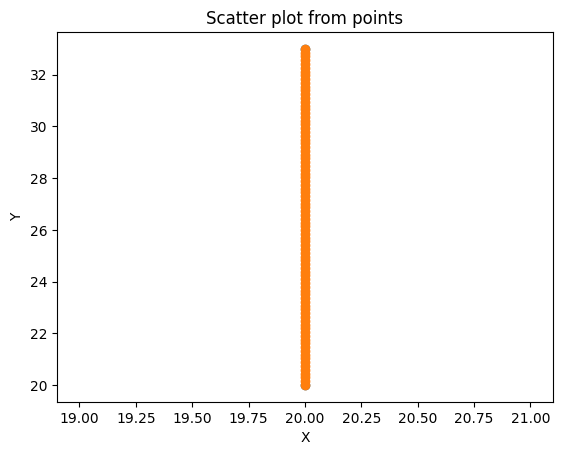

In [16]:
# Chcecking the performance of the algorithm:

checking_starting_points = [(20,20), (20,33)]
# Unpacking the tuples into the separete x and y:
# first list:
x_values, y_values = zip(*checking_starting_points)
# second list:
x_2, y_2 = zip(*check_list)

# Creating scatterplot:
plt.scatter(x_values, y_values, label = 'Algoritm')
plt.scatter(x_2, y_2, label = 'Math_approach')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()

In [17]:
# Making function to extracts the name and the coordinates as tuple:

def make_track_coords_dict(df):
    grouped = df.groupby('Track_name')
    
    # creating the dictionary with the track name and all its pos_x, pos_y as tuples:
    result_dict = {name: list(zip(group['pos_x'], group['pos_y'])) for name, group in grouped}
    
    return result_dict


In [18]:
# Generating the dictionary of the coordianates for the each track movement:
track_coords_dict = make_track_coords_dict(df_move_frames)
#track_coords_dict

# Genereting their straight lines comparisons generated in track_in_line_pos_generated

In [19]:
# How to compare the two trajectories?
# Possible metrics to use:
''' 
    Euclidean distance: This is simply the distance between the two trajectories at each time point.
    You can calculate the average or maximum distance over all time points.

    Dynamic Time Warping (DTW): DTW is a method to align two time series with similar shapes but different lengths.
    It measures the similarity between two trajectories by finding a path that minimizes the distance between corresponding points along the two trajectories.

    Fréchet distance: The Fréchet distance measures the similarity between two curves by finding the minimum leash length needed for a dog to walk along the two curves.
    It is a distance metric that is symmetric and satisfies the triangle inequality.

    Hausdorff distance: The Hausdorff distance measures the maximum distance between any point on one trajectory and the closest point on the other trajectory.
    It can be used to measure the similarity between two sets of points, where each set represents a trajectory.

    Cosine similarity: This measures the cosine of the angle between two trajectories.
    It ranges from -1 to 1, where 1 indicates identical trajectories and -1 indicates completely dissimilar trajectories.
    
    
'''

' \n    Euclidean distance: This is simply the distance between the two trajectories at each time point.\n    You can calculate the average or maximum distance over all time points.\n\n    Dynamic Time Warping (DTW): DTW is a method to align two time series with similar shapes but different lengths.\n    It measures the similarity between two trajectories by finding a path that minimizes the distance between corresponding points along the two trajectories.\n\n    Fréchet distance: The Fréchet distance measures the similarity between two curves by finding the minimum leash length needed for a dog to walk along the two curves.\n    It is a distance metric that is symmetric and satisfies the triangle inequality.\n\n    Hausdorff distance: The Hausdorff distance measures the maximum distance between any point on one trajectory and the closest point on the other trajectory.\n    It can be used to measure the similarity between two sets of points, where each set represents a trajectory.\n\n 

In [20]:
# Comparing euclidean distance of random line to the straight line:

def euclidean_distance(p1, p2):
    """
    Calculate the Euclidean distance between two points.
    """
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def total_euclidean_distance(first_list_of_points, second_list_of_points):
    """
    Calculate the total Euclidean distance between a series of points.
    """
    if len(first_list_of_points) != len(second_list_of_points):
        raise ValueError('The two series of points have different lengths')
    else:
        distance = 0
        for i in range(len(first_list_of_points)):
            distance += euclidean_distance(first_list_of_points[i], second_list_of_points[i])
        
    return distance

In [21]:
def euclidean_comparison(tracks_dict, straight_tracks_dict):
    
    # Check if the provided dictionaries have the same names of track to avoid false comparision:
    try: 
        list_of_track_names = list(track_dict.keys())
        
        list_of_straight_tracks_names = list(straight_tracks_dict.keys())
    except Exception as e:
        print(f'An error occurred: {e}')
    
    # Checking if the lists have the same content:
    try:
        set1 = set(list_of_track_names)
        set2 = set(list_of_straight_tracks_names)
        if set1 == set2:
            for name in set1:
                track_series = tracks_dict[name]
                straight_line_series = straight_tracks_dict[name]
                total_distance = total_euclidean_distance(track_series, straight_line_series)
                
                print(f'Total euclidean distance of {name} track and its linear generation: {total_distance}')
                
        else:
            print("Provided sets differ which means there could be error in generating points.")
            
    except Exception as e:
        print(f'An error occurred: {e}')

In [26]:
# Testing if the distance beetween 2 linear trajectoris which are the same show the 0 distance:
first_test_dict = {'track_1': [(1,1), (2,2), (3,3), (4,4), (5,5), (6,6)],
                   'track_2': [(1,3), (2,4), (3,5), (4,6), (5,7), (6,8)]}

second_test_dict = {'track_1': [(1,1), (2,2), (3,3), (4,4), (5,5), (6,6)],
                    'track_2': [(1,3), (2,4), (3,5), (4,6), (5,7), (6,8)]}

# Checking:
euclidean_comparison(first_test_dict, second_test_dict)

Provided sets differ which means there could be error in generating points.


In [22]:
# Check the euclidean comparison:
euclidean_comparison(track_coords_dict, track_in_line_pos_generated)

Total euclidean distance of track_16 track and its linear generation: 4473.20953721988
Total euclidean distance of track_5 track and its linear generation: 2956.971851271085
Total euclidean distance of track_1 track and its linear generation: 2429.365374273296
Total euclidean distance of track_7 track and its linear generation: 3926.5019168581152
Total euclidean distance of track_9 track and its linear generation: 2955.685633690569
Total euclidean distance of track_3 track and its linear generation: 887.6238153522663
Total euclidean distance of track_6 track and its linear generation: 3277.813882340807
Total euclidean distance of track_19 track and its linear generation: 278.22175381266686
Total euclidean distance of track_4 track and its linear generation: 3090.736884223756
Total euclidean distance of track_11 track and its linear generation: 749.964251151948
Total euclidean distance of track_2 track and its linear generation: 324.8375824823986
Total euclidean distance of track_12 tra